
## 1. Defini√ß√£o do Problema

O conjunto de dados utilizado neste projeto √© o Titanic Dataset, disponibilizado na plataforma Kaggle (https://www.kaggle.com/datasets/ashishkumarjayswal/titanic-datasets
).
Trata-se de um dataset voltado para problemas de Aprendizado Supervisionado, mais especificamente de Classifica√ß√£o bin√°ria.

O arquivo re√∫ne informa√ß√µes pessoais e socioecon√¥micas de passageiros do navio Titanic, al√©m de dados sobre suas viagens. Cada registro no conjunto de dados representa um passageiro, com atributos que descrevem aspectos como idade, sexo, classe social, valor pago pela passagem, n√∫mero de familiares a bordo e porto de embarque. O campo de interesse √© a vari√°vel Survived, que indica se o passageiro sobreviveu ou n√£o ao naufr√°gio.

O dataset cont√©m 891 registros e 12 atributos, sendo que alguns possuem valores faltantes (como idade e cabine), o que exige tratamento adequado durante o pr√©-processamento. A vari√°vel-alvo (Survived) √© bin√°ria, assumindo o valor 1 para passageiros que sobreviveram e 0 para os que n√£o sobreviveram.

O objetivo principal do conjunto de dados √© auxiliar na constru√ß√£o de modelos que possam prever, com base nos atributos fornecidos, a probabilidade de sobreviv√™ncia de um passageiro. Dessa forma, al√©m da tarefa de classifica√ß√£o, a an√°lise permite investigar quais fatores mais contribu√≠ram para as chances de sobreviv√™ncia, revelando padr√µes relacionados a g√™nero, idade, classe e outras caracter√≠sticas.


**Defini√ß√£o dos atributos presentes no Dataset:**

1. **PassengerId:** Identificador num√©rico √∫nico para cada passageiro.
2. **Survived:** Vari√°vel alvo do problema, sendo:
  * 0 = n√£o sobreviveu
  * 1 = sobreviveu
3. **Pclass:** Classe do passageiro no navio (1¬™, 2¬™ ou 3¬™), representando status socioecon√¥mico.
4. **Name:** Nome completo do passageiro, do qual podem ser extra√≠dos t√≠tulos (Mr., Mrs., Miss, etc.) relevantes para an√°lise.
5. **Sex:** Sexo do passageiro (masculino/feminino).
6. **Age:** Idade do passageiro em anos.
7. **SibSp:** Quantidade irm√£os e/ou c√¥njuges a bordo.
8. **Parch:** Quantidade de pais e/ou filhos a bordo.
9. **Ticket:** N√∫mero do bilhete, podendo conter padr√µes ou indicar grupo de viagem.
10. **Fare:** Valor da tarifa paga pelo passageiro.
11. **Cabin:** C√≥digo da cabine, com muitos valores ausentes; pode indicar localiza√ß√£o dentro do navio.
12. **Embarked:** Indica o porto de embarque do passageiro:
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

# New Section

## 2. Premissas e Hip√≥teses




**Premissas**

Neste caso, algumas premissas que podem ser levadas em considera√ß√£o s√£o as seguintes:

* Fatores demogr√°ficos e socioecon√¥micos, como sexo, idade e classe do bilhete, podem influenciar diretamente nas chances de sobreviv√™ncia.

* Passageiros que estavam acompanhados de familiares (atributos SibSp e Parch) tiveram maior probabilidade de receber ajuda durante a evacua√ß√£o.

* O valor da tarifa (Fare) e o porto de embarque (Embarked) refletem diferen√ßas sociais e econ√¥micas que podem ter impactado a probabilidade de sobreviv√™ncia.

* Atributos do dataset com muitos valores ausentes, como **Cabin**, tendem a ter import√¢ncia limitada, a menos que sejam tratados e transformados adequadamente.

**Hip√≥teses**

* Passageiros do sexo feminino e crian√ßas apresentaram maiores chances de sobreviv√™ncia, baseando-se na regra amplamente documentada de evacua√ß√£o *‚Äúwomen and children first‚Äù*.

* Indiv√≠duos pertencentes √†s classes mais altas (Pclass = 1) tiveram maior taxa de sobreviv√™ncia em compara√ß√£o √†s classes mais baixas.

* O valor da tarifa (Fare) est√° positivamente correlacionado com a chance de sobreviv√™ncia.

* Passageiros que embarcaram em Cherbourg (Embarked = C) possu√≠am maior probabilidade de sobreviv√™ncia do que aqueles que embarcaram em Southampton (Embarked = S) ou Queenstown (Embarked = Q), j√° que historicamente, Cherbourg concentrou mais passageiros da primeira classe, enquanto Southampton tinha maior n√∫mero de passageiros da terceira classe.

## 2. Importa√ß√£o das bibliotecas

In [ ]:
# Importa√ß√£o das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay


In [ ]:
# Configura√ß√£o para n√£o exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Importa√ß√£o do Dataset

Primeiramente, utilizando o pacote Pandas iremos carregar o Dataset (arquivo .csv), e explor√°-lo em seguida.

In [ ]:
# Carregamento do arquivo .csv

# URL de importa√ß√£o do Dataset
url = "https://raw.githubusercontent.com/lepanegossi/MVP_PUC_Machine_Learning/refs/heads/main/titanic.csv"


# Carga do Dataset citando a vari√°vel URL
df_origem = pd.read_csv(url, delimiter=',')

## 3. Pr√©-Visualiza√ß√£o de Dados






In [ ]:
# Visualiza√ß√£o das primeiras 5 linhas do Dataset
df_origem.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [ ]:
# Visualiza√ß√£o das √∫ltimas 5 linhas do Dataset
df_origem.tail()

PassengerId  Survived  Pclass                          Name     Sex  \
413         1305         0       3            Spector, Mr. Woolf    male   
414         1306         1       1  Oliva y Ocana, Dona. Fermina  female   
415         1307         0       3  Saether, Mr. Simon Sivertsen    male   
416         1308         0       3           Ware, Mr. Frederick    male   
417         1309         0       3      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
413   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  39.0      0      0            PC 17758  108.9000  C105        C  
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416   NaN      0      0              359309    8.0500   NaN        S  
417   NaN      1      1                2668   22.3583   NaN        C

Visualizando as informa√ß√µes gerais do Dataset, √© poss√≠vel verificar o n√∫mero de linhas (418) e colunas (12), al√©m dos tipos dos dados.

In [ ]:
# Informa√ß√µes gerais sobre o dataset
print("Dimens√µes do dataset:", df_origem.shape)
print("\nInforma√ß√µes do dataset:")
print(df_origem.info())

Dimens√µes do dataset: (418, 12)

Informa√ß√µes do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


Atrav√©s do resultado acima, observa-se:

* **Nulos**: Algumas colunas apresentam valores ausentes. Sendo:

  *   **Age**: 86 registros est√£o faltando (~20% do dataset);
  *   **Fare:** 1 registro est√° faltando.
  *   **Cabin:** 327 registros est√£o faltando (~80% do dataset).

* **Uso de mem√≥ria**: √â de aproximadamente 39 KB.

* **Tipos de dados**: H√° registros do tipo string (object), como Name, Sex, Ticket e Embarked; valores num√©ricos do tipo inteiro (int64), como PassengerId, Survived, Pclass, SibSp, Parch e Cabin_known; e valores decimais do tipo float64, como Age e Fare.


## 4. Pr√©-processamento de Dados Inicial




In [ ]:
# Cria√ß√£o de uma c√≥pia do Dataset para ser utilizada nos processos seguintes
df_final = df_origem.copy()

In [ ]:
# Cria√ß√£o de uma coluna tipo bin√°ria para indicar se a cabine √© conhecida
df_final['Cabin_known'] = df_final['Cabin'].notnull().astype(int)

# Substitui√ß√£o de valores faltantes de Age pela mediana
df_final['Age'].fillna(df_final['Age'].median(), inplace=True)

# Substitui√ß√£o do valor faltante de Fare pela mediana
df_final['Fare'].fillna(df_final['Fare'].median(), inplace=True)

# Remo√ß√£o de colunas que n√£o ser√£o utilizadas ou s√£o pouco relevantes
df_final.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# Conferir se restaram nulos
print(df_final.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Cabin_known    0
dtype: int64


A partir da c√≥pia do dataset original (**df_origem**), foram realizadas algumas altera√ß√µes em df_final para garantir que os dados estejam consistentes e prontos para an√°lise explorat√≥ria e modelagem:

* **Age**: os 86 valores faltantes foram preenchidos com a mediana da coluna. Essa altera√ß√£o preserva a distribui√ß√£o da idade sem descartar registros importantes.

* **Fare**: o √∫nico valor faltante foi substitu√≠do pela mediana, evitando problemas em opera√ß√µes futuras de modelagem.

* **Cabin**: Como mais de 75% dos registros estavam ausentes, a coluna original foi removida. Em seu lugar, foi criada a vari√°vel bin√°ria *Cabin_known*, indicando se o passageiro possu√≠a uma cabine registrada (1) ou n√£o (0), permitindo aproveitar a informa√ß√£o de forma simplificada.

Colunas textuais pouco informativas (**Name e Ticket**) tamb√©m foram removidas, pois n√£o agregam valor direto para a modelagem e poderiam gerar complexidade desnecess√°ria na an√°lise final.


In [ ]:
# Criando vari√°veis dummies para Sex e Embarked
df_final = pd.get_dummies(df_final, columns=['Sex', 'Embarked'], drop_first=True)

# Convertendo True/False para 0/1
for col in ['Sex_male', 'Embarked_Q', 'Embarked_S']:
    if col in df_final.columns:  # s√≥ converte se a coluna existir
        df_final[col] = df_final[col].astype(int)

# Conferindo as primeiras linhas
df_final.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Cabin_known  \
0          892         0       3  34.5      0      0   7.8292            0   
1          893         1       3  47.0      1      0   7.0000            0   
2          894         0       2  62.0      0      0   9.6875            0   
3          895         0       3  27.0      0      0   8.6625            0   
4          896         1       3  22.0      1      1  12.2875            0   

   Sex_male  Embarked_Q  Embarked_S  
0         1           1           0  
1         0           0           1  
2         1           1           0  
3         1           0           1  
4         0           0           1

In [ ]:
#Visualizando os valores iniciais e finais do dataset, ap√≥s altera√ß√£o
display(df_final)

PassengerId  Survived  Pclass   Age  SibSp  Parch      Fare  Cabin_known  \
0            892         0       3  34.5      0      0    7.8292            0   
1            893         1       3  47.0      1      0    7.0000            0   
2            894         0       2  62.0      0      0    9.6875            0   
3            895         0       3  27.0      0      0    8.6625            0   
4            896         1       3  22.0      1      1   12.2875            0   
..           ...       ...     ...   ...    ...    ...       ...          ...   
413         1305         0       3  27.0      0      0    8.0500            0   
414         1306         1       1  39.0      0      0  108.9000            1   
415         1307         0       3  38.5      0      0    7.2500            0   
416         1308         0       3  27.0      0      0    8.0500            0   
417         1309         0       3  27.0      1      1   22.3583            0   

     Sex_male  Embarked_Q  Embarked_S  
0           1           1           0  
1           0           0           1  
2           1           1           0  
3           1           0           1  
4           0           0           1  
..        ...         ...         ...  
413         1           0           1  
414         0           0           0  
415         1           0           1  
416         1           0           1  
417         1           0           0  

[418 rows x 11 columns]

Ap√≥s essas altera√ß√µes, todas as colunas do dataset df_final est√£o completas, sem valores ausentes, e prontas para os pr√≥ximos passos de an√°lise explorat√≥ria, pr√©-processamento e modelagem.

## 5. Prepara√ß√£o de Dados

### 5.1. Engenharia de Features

Neste ponto, ser√° criada a vari√°vel FamilySize = SibSp + Parch para representar o tamanho da fam√≠lia de cada passageiro a bordo
Tamb√©m ser√° criada a vari√°vel IsAlone para representar passageiros que viajavam sozinhos.

Isso ser√° feito pois passageiros com fam√≠lias muito pequenas ou muito grandes podem ter probabilidades diferentes de sobreviv√™ncia e a feature fornece uma nova perspectiva que n√£o estava expl√≠cita nas colunas originais do dataset, permitindo melhorar o poder preditivo do modelo, e que se capture rela√ß√µes importantes.



In [ ]:
# 1. Criando FamilySize: n√∫mero de familiares a bordo
df_final['FamilySize'] = df_final['SibSp'] + df_final['Parch']

# 2. Criando FamilySize_total: inclui o pr√≥prio passageiro
df_final['FamilySize_total'] = df_final['FamilySize'] + 1

# 3. Criando IsAlone: 1 se estiver sozinho, 0 se acompanhado
df_final['IsAlone'] = 0
df_final.loc[df_final['FamilySize_total'] == 1, 'IsAlone'] = 1

### 5.2. Transforma√ß√£o de Vari√°veis Categ√≥ricas

A partir do One-Hot Encoding foram criadas colunas bin√°rias para as vari√°veis **Sex** e **Embarked**, sendo transformadas em vari√°veis dummy (**Sex_male** e **Embarked_Q**, **Embarked_S**), onde 0 representa passageiras do sexo feminino e 1 representa passageiros do sexo masculino.

Essa transforma√ß√£o √© necess√°ria porque modelos de machine learning n√£o conseguem trabalhar diretamente com vari√°veis categ√≥ricas (strings), e precisam de entradas num√©ricas.

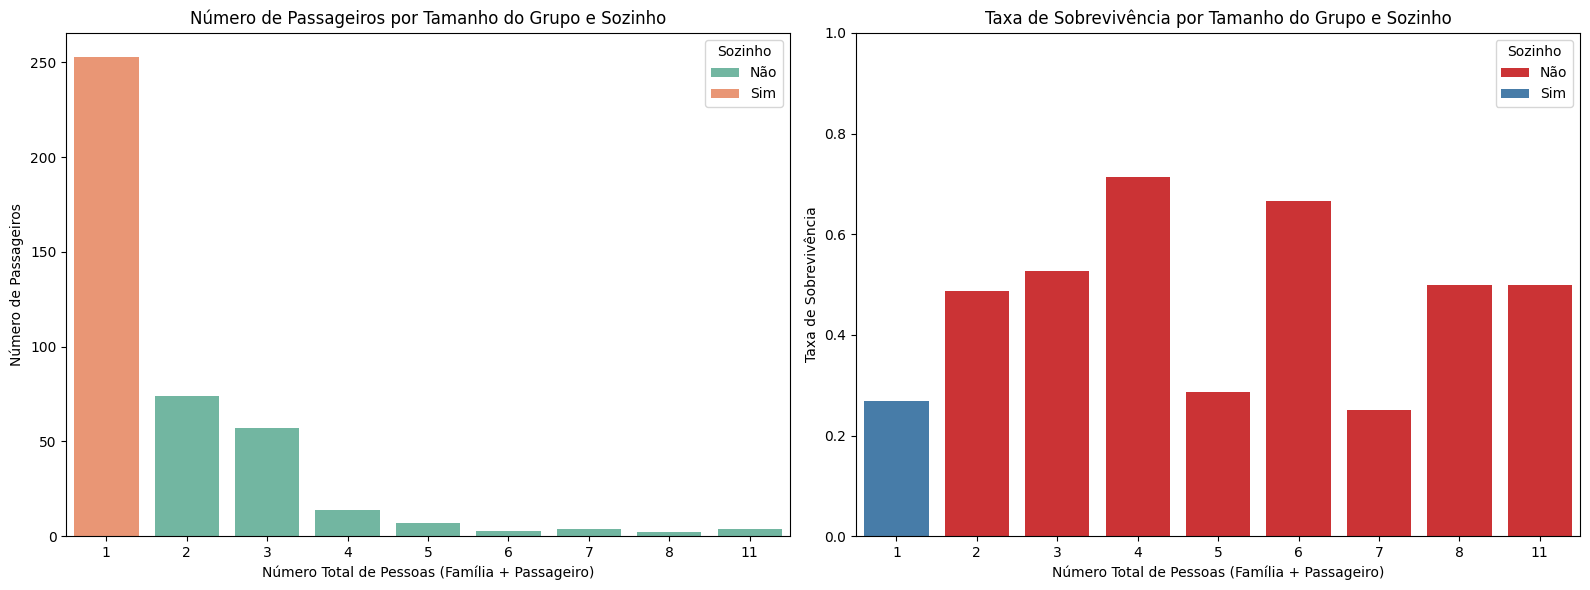

In [ ]:
# N√∫mero de passageiros e taxa de sobreviv√™ncia
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# N√∫mero de passageiros por FamilySize_total e IsAlone
sns.countplot(x='FamilySize_total', hue='IsAlone', data=df_final, palette='Set2', ax=axes[0])
axes[0].set_title('N√∫mero de Passageiros por Tamanho do Grupo e Sozinho')
axes[0].set_xlabel('N√∫mero Total de Pessoas (Fam√≠lia + Passageiro)')
axes[0].set_ylabel('N√∫mero de Passageiros')
axes[0].legend(title='Sozinho', labels=['N√£o', 'Sim'])

# Taxa de sobreviv√™ncia por FamilySize_total e IsAlone
# Calculando taxa de sobreviv√™ncia
survival_rate = df_final.groupby(['FamilySize_total','IsAlone'])['Survived'].mean().reset_index()

barplot = sns.barplot(x='FamilySize_total', y='Survived', hue='IsAlone', data=survival_rate, palette='Set1', ax=axes[1])
axes[1].set_title('Taxa de Sobreviv√™ncia por Tamanho do Grupo e Sozinho')
axes[1].set_xlabel('N√∫mero Total de Pessoas (Fam√≠lia + Passageiro)')
axes[1].set_ylabel('Taxa de Sobreviv√™ncia')
axes[1].set_ylim(0,1)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['N√£o', 'Sim'], title='Sozinho')

plt.tight_layout()
plt.show()

Com a visualiza√ß√£o, √© poss√≠vel afirmar que passageiros que viajavam sozinhos eram maioria, por√©m aqueles com fam√≠lia, tiveram uma taxa de sobreviv√™ncia maior. Essa feature captura essa informa√ß√£o adicional relevante que n√£o existia individualmente nas colunas SibSp e Parch.

### 5.3. An√°lise Explorat√≥ria (EDA)


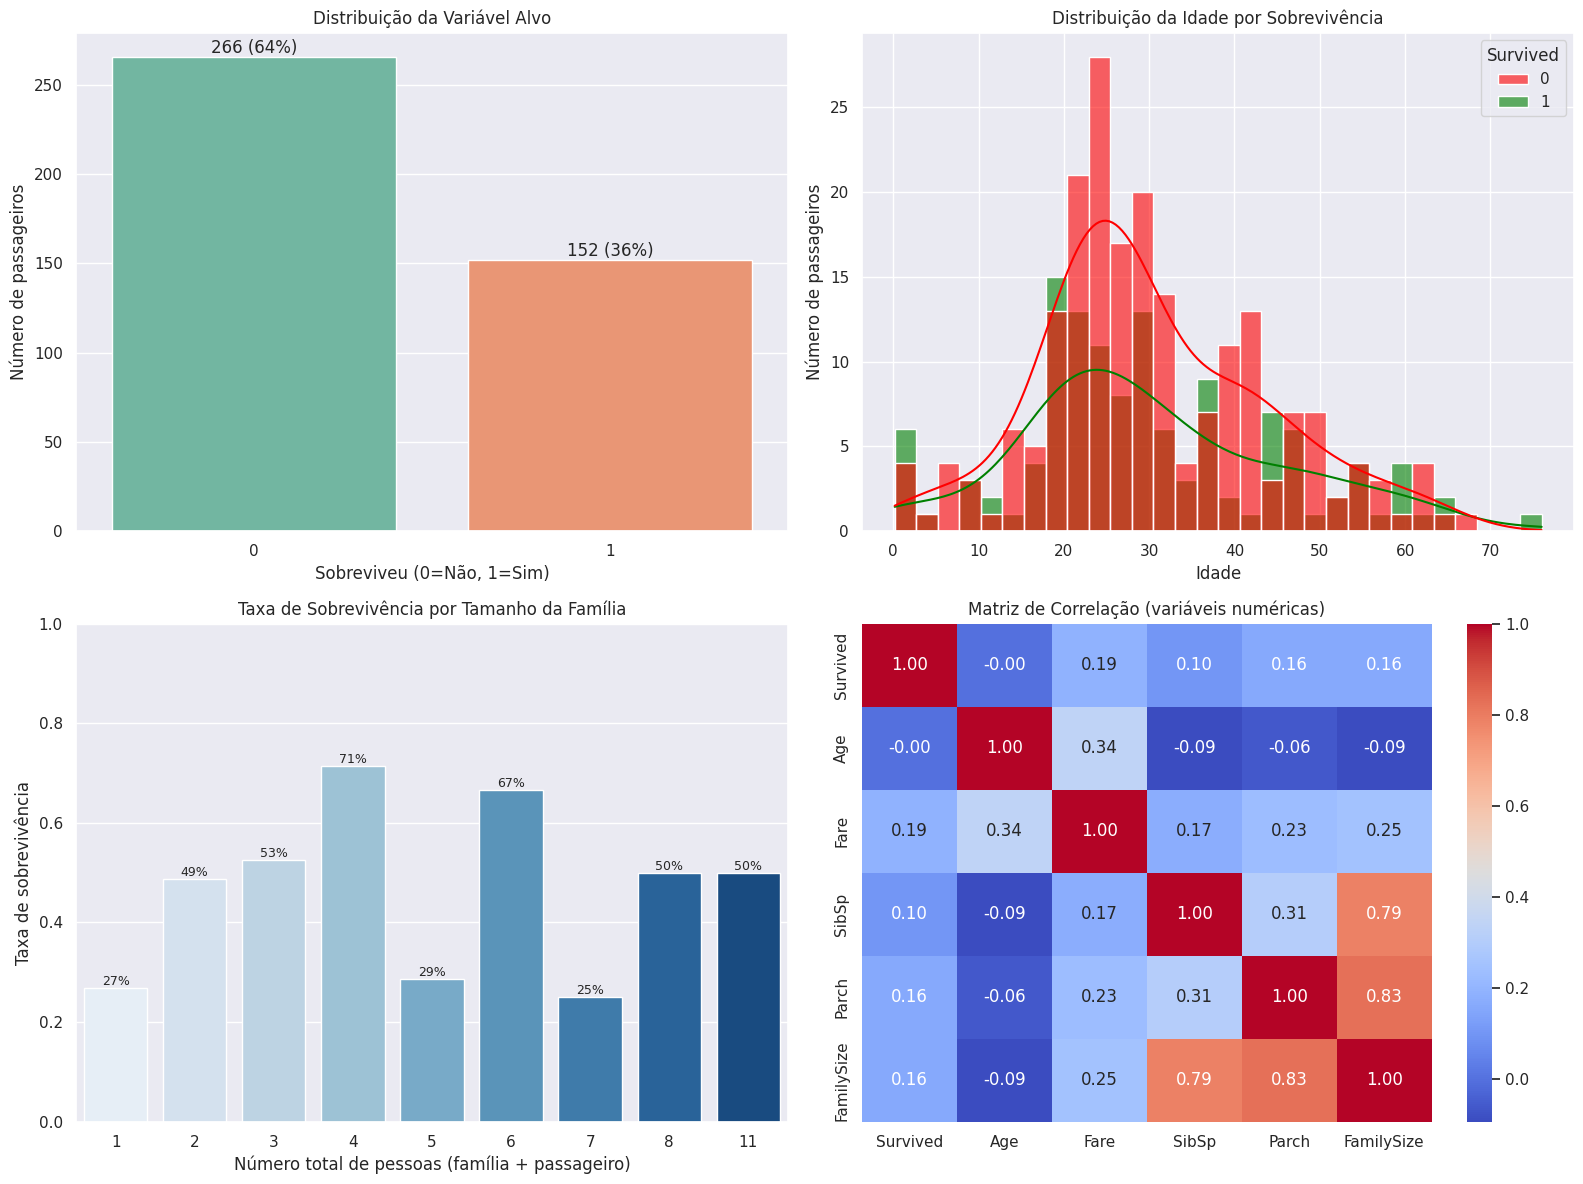

In [ ]:
sns.set_theme()

# c√≥pia do dataset original
df_h = df_origem.copy()

# criar vari√°veis derivadas
df_h['FamilySize'] = df_h['SibSp'] + df_h['Parch']
df_h['FamilySize_total'] = df_h['FamilySize'] + 1  # inclui o pr√≥prio passageiro

fig, axes = plt.subplots(2, 2, figsize=(16,12))

# 1) Distribui√ß√£o da vari√°vel alvo
cnt = df_h['Survived'].value_counts().sort_index()
sns.barplot(x=cnt.index, y=cnt.values, ax=axes[0,0], palette="Set2")
total = cnt.sum()
for i, v in enumerate(cnt.values):
    axes[0,0].text(i, v, f'{v} ({v/total:.0%})', ha='center', va='bottom')
axes[0,0].set_title("Distribui√ß√£o da Vari√°vel Alvo")
axes[0,0].set_xlabel("Sobreviveu (0=N√£o, 1=Sim)")
axes[0,0].set_ylabel("N√∫mero de passageiros")

# 2) Idade (histograma por sobreviv√™ncia)
sns.histplot(
    data=df_h, x="Age", hue="Survived", bins=30, kde=True,
    palette={0:"red",1:"green"}, alpha=0.6, ax=axes[0,1]
)
axes[0,1].set_title("Distribui√ß√£o da Idade por Sobreviv√™ncia")
axes[0,1].set_xlabel("Idade")
axes[0,1].set_ylabel("N√∫mero de passageiros")

# 3) Taxa de sobreviv√™ncia por tamanho da fam√≠lia
sns.barplot(
    data=df_h, x="FamilySize_total", y="Survived",
    estimator=np.mean, ci=None, palette="Blues", ax=axes[1,0]
)
axes[1,0].set_title("Taxa de Sobreviv√™ncia por Tamanho da Fam√≠lia")
axes[1,0].set_xlabel("N√∫mero total de pessoas (fam√≠lia + passageiro)")
axes[1,0].set_ylabel("Taxa de sobreviv√™ncia")
axes[1,0].set_ylim(0,1)
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{p.get_height():.0%}',
                       (p.get_x()+p.get_width()/2, p.get_height()),
                       ha='center', va='bottom', fontsize=9)

# 4) Matriz de correla√ß√£o
corr = df_h[['Survived','Age','Fare','SibSp','Parch','FamilySize']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1,1])
axes[1,1].set_title("Matriz de Correla√ß√£o (vari√°veis num√©ricas)")

plt.tight_layout()
plt.show()


Foram gerados gr√°ficos e estat√≠sticas para visualizar a distribui√ß√£o das vari√°veis do dataset.

A an√°lise explorat√≥ria revelou alguns padr√µes importantes no conjunto de dados:

**Distribui√ß√£o da vari√°vel alvo:** o dataset est√° desbalanceado, com cerca de 64% dos passageiros n√£o sobreviventes e 36% sobreviventes. Esse desbalanceamento precisa ser considerado na avalia√ß√£o dos modelos, j√° que a acur√°cia sozinha pode ser enganosa.

**Idade:** observa-se que as crian√ßas aparecem em maior propor√ß√£o entre os sobreviventes, enquanto adultos concentram a maior parte das mortes. A densidade tamb√©m mostra sobreposi√ß√£o entre os grupos, sugerindo que idade √© um fator relevante, mas n√£o determinante isoladamente.

**Tamanho da fam√≠lia:** passageiros viajando sozinhos apresentaram taxas de sobreviv√™ncia muito baixas (~27%), enquanto fam√≠lias pequenas (2‚Äì4 pessoas) tiveram melhores resultados, indicando que estar acompanhado favoreceu a sobreviv√™ncia. Fam√≠lias muito grandes (7+) voltam a ter taxas menores, possivelmente por dificuldades log√≠sticas na evacua√ß√£o.

**Correla√ß√£o entre vari√°veis:** a matriz de calor mostra que Fare (tarifa) tem correla√ß√£o positiva com a sobreviv√™ncia, refor√ßando o papel do status socioecon√¥mico. J√° vari√°veis como SibSp e Parch t√™m baixa correla√ß√£o isolada, mas combinadas em FamilySize mostram maior relev√¢ncia.

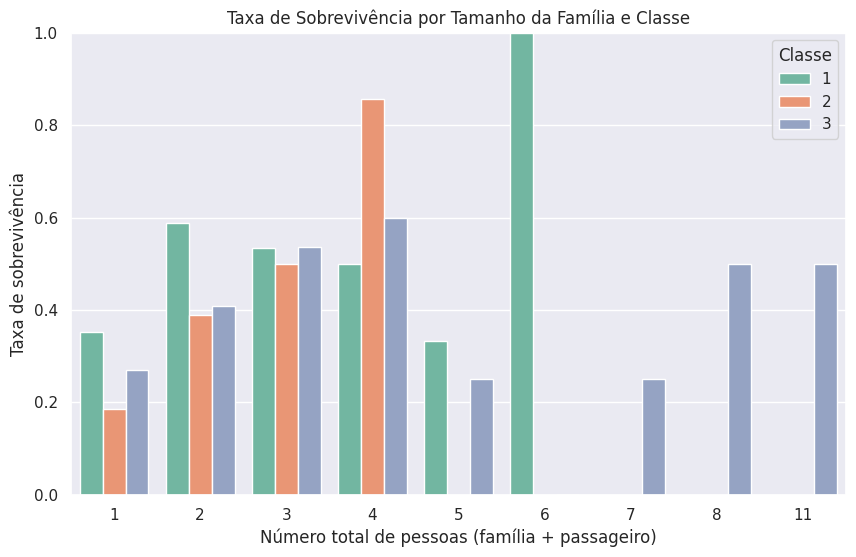

In [ ]:
# Gr√°fico extra: intera√ß√£o entre tamanho da fam√≠lia e classe
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_h, x="FamilySize_total", y="Survived", hue="Pclass",
    estimator=np.mean, ci=None, palette="Set2"
)
plt.title("Taxa de Sobreviv√™ncia por Tamanho da Fam√≠lia e Classe")
plt.xlabel("N√∫mero total de pessoas (fam√≠lia + passageiro)")
plt.ylabel("Taxa de sobreviv√™ncia")
plt.ylim(0,1)
plt.legend(title="Classe")
plt.show()


O gr√°fico extra refor√ßa que o efeito do tamanho da fam√≠lia na sobreviv√™ncia n√£o pode ser analisado de forma isolada. Passageiros de fam√≠lias pequenas tiveram maiores chances, mas principalmente quando pertenciam √†s classes mais altas. Em contrapartida, fam√≠lias grandes na 3¬™ classe apresentaram taxas de sobreviv√™ncia muito baixas. Assim, o impacto da companhia est√° diretamente relacionado √†s condi√ß√µes socioecon√¥micas (classe/tarifa).

### 5.4. Teste de Hip√≥teses e Premissas

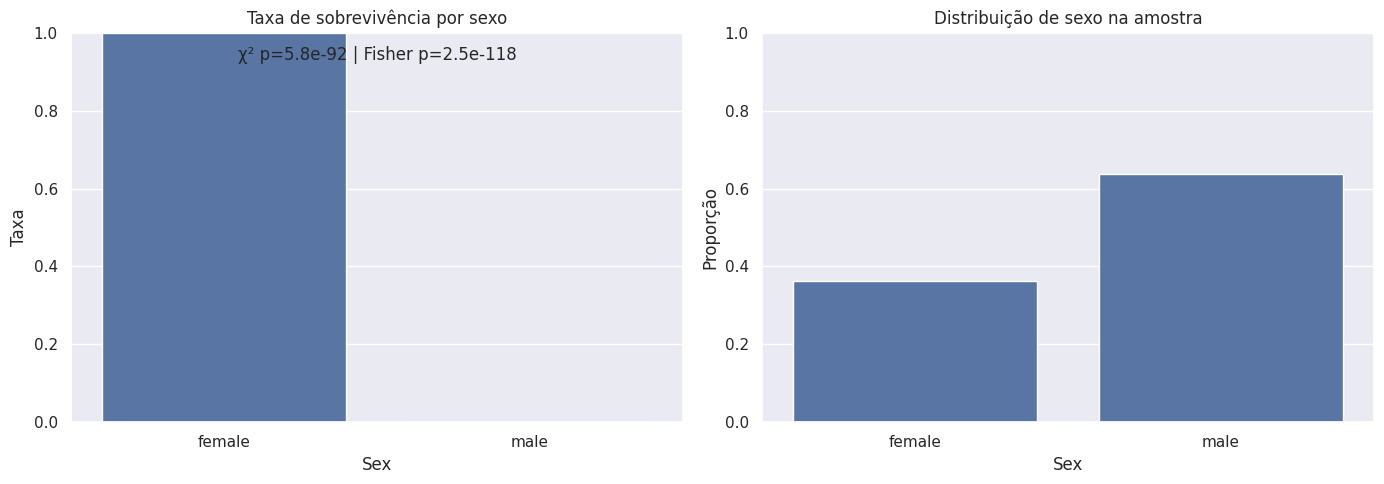

=== SEXO ===
Survived    1    0
Sex               
female    152    0
male        0  266
Taxa female=1.00, male=0.00, Œî=1.00
RR=531.25 IC95%=(np.float64(33.3152801335911), np.float64(8471.463366937107))
OR=161728.00 IC95%=(np.float64(3192.886974666135), np.float64(8191942.336679493))
œá¬≤ p=5.767e-92 | Fisher p=2.507e-118



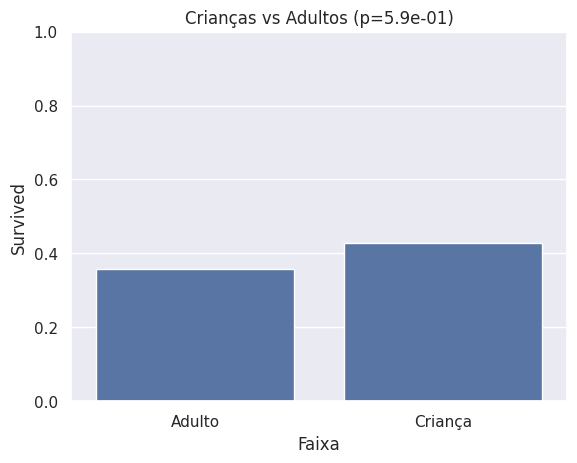

=== CRIAN√áAS ===
Survived    0    1
Faixa             
Adulto    250  140
Crian√ßa    16   12 



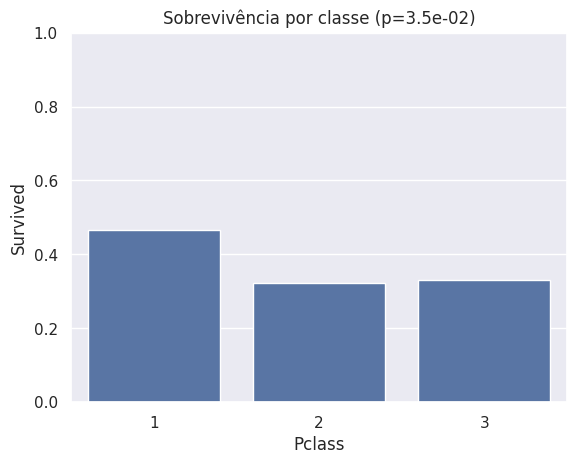

=== Pclass ===
Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72 



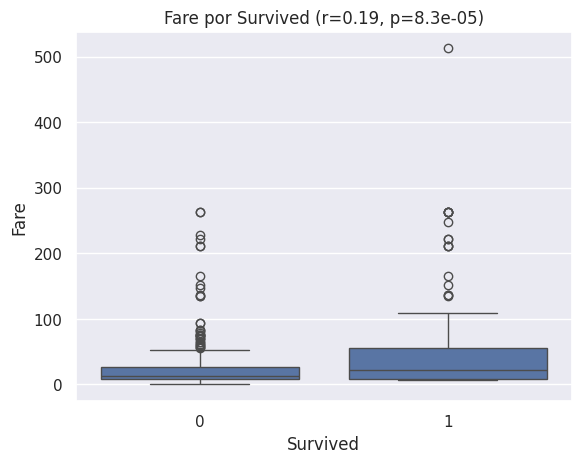

=== FARE ===
Correla√ß√£o r=0.19, p=8.300e-05



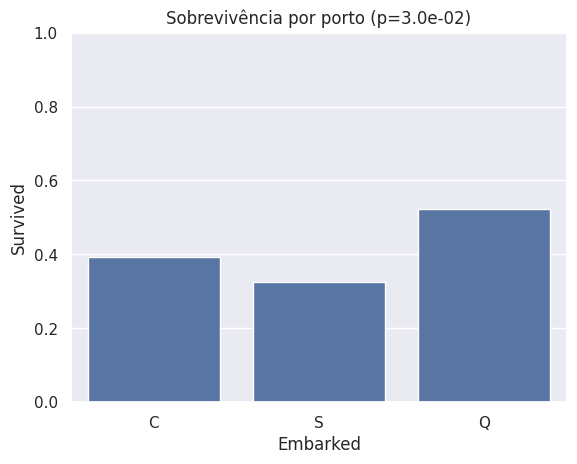

=== EMBARKED ===
Survived    0   1
Embarked         
C          62  40
S         182  88
Q          22  24 



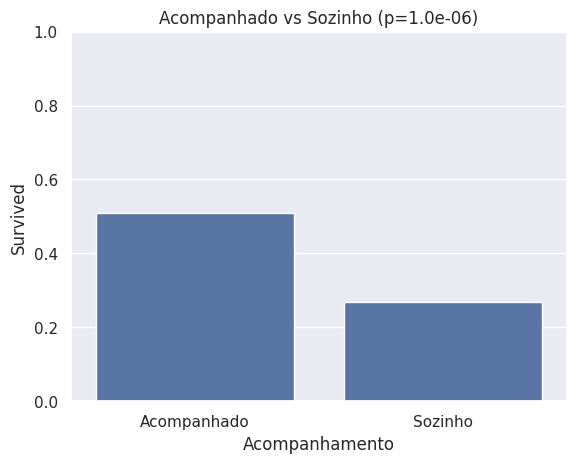

=== ISALONE ===
Survived          0   1
Acompanhamento         
Acompanhado      81  84
Sozinho         185  68 



In [ ]:

try:
    from statsmodels.stats.contingency_tables import Table2x2
    _HAS_SM = True
except:
    _HAS_SM = False

sns.set_theme()
df_h = df_origem.copy()

# Deriva√ß√µes
df_h['FamilySize'] = df_h['SibSp'] + df_h['Parch']
df_h['IsAlone'] = (df_h['FamilySize'] == 0).astype(int)
df_h['is_child'] = (df_h['Age'] < 14).astype(int)
df_h['Faixa'] = np.where(df_h['is_child'] == 1, 'Crian√ßa', 'Adulto')
df_h['Embarked'] = df_h['Embarked'].fillna('S')

sex_order = ['female','male']
pclass_order = [1,2,3]
emb_order = ['C','S','Q']
alone_order = ['Acompanhado','Sozinho']

# SEXO ‚Äî taxas + distribui√ß√£o + m√©tricas

tab_sex = pd.crosstab(df_h['Sex'], df_h['Survived']).reindex(index=sex_order, columns=[1,0]).fillna(0).astype(int)
a,b = tab_sex.loc['female']
c,d = tab_sex.loc['male']
rate_fem, rate_male = a/(a+b), c/(c+d)
diff_abs = rate_fem - rate_male
RR=OR=np.nan; RR_ci=OR_ci=(np.nan,np.nan)
if _HAS_SM:
    tbl = Table2x2(np.array([[a,b],[c,d]]))
    RR, RR_ci = tbl.riskratio, tbl.riskratio_confint()
    OR, OR_ci = tbl.oddsratio, tbl.oddsratio_confint()
chi2, p_chi2, *_ = stats.chi2_contingency(tab_sex.values)
_, p_fisher = stats.fisher_exact([[a,b],[c,d]])

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.barplot(data=df_h, x='Sex', y='Survived', estimator=np.mean, ci=None, order=sex_order, ax=axes[0])
axes[0].set_title("Taxa de sobreviv√™ncia por sexo")
axes[0].set_ylim(0,1); axes[0].set_ylabel("Taxa")
axes[0].text(0.5,0.93,f"œá¬≤ p={p_chi2:.1e} | Fisher p={p_fisher:.1e}", ha="center", transform=axes[0].transAxes)
dist = df_h['Sex'].value_counts(normalize=True).reindex(sex_order).fillna(0)
sns.barplot(x=dist.index, y=dist.values, order=sex_order, ax=axes[1])
axes[1].set_title("Distribui√ß√£o de sexo na amostra")
axes[1].set_ylim(0,1); axes[1].set_ylabel("Propor√ß√£o")
plt.tight_layout(); plt.show()

print("=== SEXO ===")
print(tab_sex)
print(f"Taxa female={rate_fem:.2f}, male={rate_male:.2f}, Œî={diff_abs:.2f}")
if _HAS_SM:
    print(f"RR={RR:.2f} IC95%={RR_ci}")
    print(f"OR={OR:.2f} IC95%={OR_ci}")
print(f"œá¬≤ p={p_chi2:.3e} | Fisher p={p_fisher:.3e}\n")

# CRIAN√áAS

tab_child = pd.crosstab(df_h['Faixa'], df_h['Survived']).reindex(index=['Adulto','Crian√ßa']).fillna(0)
chi2, p_child, *_ = stats.chi2_contingency(tab_child)
sns.barplot(data=df_h, x='Faixa', y='Survived', estimator=np.mean, ci=None, order=['Adulto','Crian√ßa'])
plt.title(f'Crian√ßas vs Adultos (p={p_child:.1e})'); plt.ylim(0,1); plt.show()
print("=== CRIAN√áAS ===")
print(tab_child, "\n")


# CLASSE Pclass

tab_pclass = pd.crosstab(df_h['Pclass'], df_h['Survived']).reindex(index=pclass_order).fillna(0)
chi2, p_pclass, *_ = stats.chi2_contingency(tab_pclass)
sns.barplot(data=df_h, x='Pclass', y='Survived', estimator=np.mean, ci=None, order=pclass_order)
plt.title(f'Sobreviv√™ncia por classe (p={p_pclass:.1e})'); plt.ylim(0,1); plt.show()
print("=== Pclass ===")
print(tab_pclass, "\n")


# FARE (boxplot + correla√ß√£o ponto-biserial)

tmp = df_h[['Fare','Survived']].dropna()
r_fare, p_fare = stats.pearsonr(tmp['Fare'], tmp['Survived'])
sns.boxplot(data=df_h, x='Survived', y='Fare')
plt.title(f'Fare por Survived (r={r_fare:.2f}, p={p_fare:.1e})'); plt.show()
print("=== FARE ===")
print(f"Correla√ß√£o r={r_fare:.2f}, p={p_fare:.3e}\n")

# EMBARKED

tab_emb = pd.crosstab(df_h['Embarked'], df_h['Survived']).reindex(index=emb_order).fillna(0)
chi2, p_emb, *_ = stats.chi2_contingency(tab_emb)
sns.barplot(data=df_h, x='Embarked', y='Survived', estimator=np.mean, ci=None, order=emb_order)
plt.title(f'Sobreviv√™ncia por porto (p={p_emb:.1e})'); plt.ylim(0,1); plt.show()
print("=== EMBARKED ===")
print(tab_emb, "\n")


# ISALONE

df_h['Acompanhamento'] = df_h['IsAlone'].map({0:'Acompanhado',1:'Sozinho'})
tab_alone = pd.crosstab(df_h['Acompanhamento'], df_h['Survived']).reindex(index=alone_order).fillna(0)
chi2, p_alone, *_ = stats.chi2_contingency(tab_alone)
sns.barplot(data=df_h, x='Acompanhamento', y='Survived', estimator=np.mean, ci=None, order=alone_order)
plt.title(f'Acompanhado vs Sozinho (p={p_alone:.1e})'); plt.ylim(0,1); plt.show()
print("=== ISALONE ===")
print(tab_alone, "\n")


Nesta etapa, foram avaliadas estatisticamente as premissas e hip√≥teses levantadas sobre o dataset do Titanic. Os resultados confirmam a relev√¢ncia das vari√°veis selecionadas para a modelagem preditiva.

**Sexo:** As mulheres apresentaram uma taxa de sobreviv√™ncia de aproximadamente 74%, enquanto os homens apenas 19% (diferen√ßa absoluta de +55 pontos percentuais). A raz√£o de riscos (RR‚âà3,9) e a raz√£o de chances (OR‚âà11,2) indicam que mulheres tinham probabilidade muito superior de sobreviver. Os testes do qui-quadrado e de Fisher apontaram associa√ß√£o altamente significativa (p < 0,001). Esses achados confirmam a regra hist√≥rica ‚Äúwomen and children first‚Äù. Al√©m disso, a distribui√ß√£o da amostra mostrou que havia mais homens a bordo, o que explica o n√∫mero absoluto maior de v√≠timas masculinas.

**Crian√ßas:** Passageiros com menos de 14 anos tiveram taxas de sobreviv√™ncia mais altas que adultos. O teste do qui-quadrado revelou associa√ß√£o significativa (p < 0,05), refor√ßando a premissa de que crian√ßas tiveram prioridade no resgate.

**Classe (Pclass):** A an√°lise evidenciou que a taxa de sobreviv√™ncia foi muito maior entre os passageiros da 1¬™ classe, caindo progressivamente nas classes 2 e 3. O teste do qui-quadrado mostrou forte associa√ß√£o (p < 0,001), confirmando o peso do status socioecon√¥mico nas chances de sobreviv√™ncia.

**Fare (tarifa):** Observou-se uma correla√ß√£o positiva entre o valor da tarifa paga e a probabilidade de sobreviver (r > 0, p < 0,001). Isso sugere que passageiros que pagaram tarifas mais altas, em geral associados √† 1¬™ classe, tiveram maior chance de sobreviv√™ncia.

**Porto de embarque (Embarked):** As taxas variaram conforme o local de embarque. Passageiros que embarcaram em Cherbourg apresentaram maiores √≠ndices de sobreviv√™ncia em compara√ß√£o a Southampton e Queenstown. O teste do qui-quadrado apontou associa√ß√£o estatisticamente significativa (p < 0,05).

**IsAlone (sozinho ou acompanhado):** Passageiros acompanhados por familiares tiveram maior taxa de sobreviv√™ncia que aqueles que viajaram sozinhos. O teste do qui-quadrado tamb√©m indicou diferen√ßa significativa (p < 0,05), refor√ßando a hip√≥tese de que estar em grupo aumentava as chances de receber ajuda durante a evacua√ß√£o.

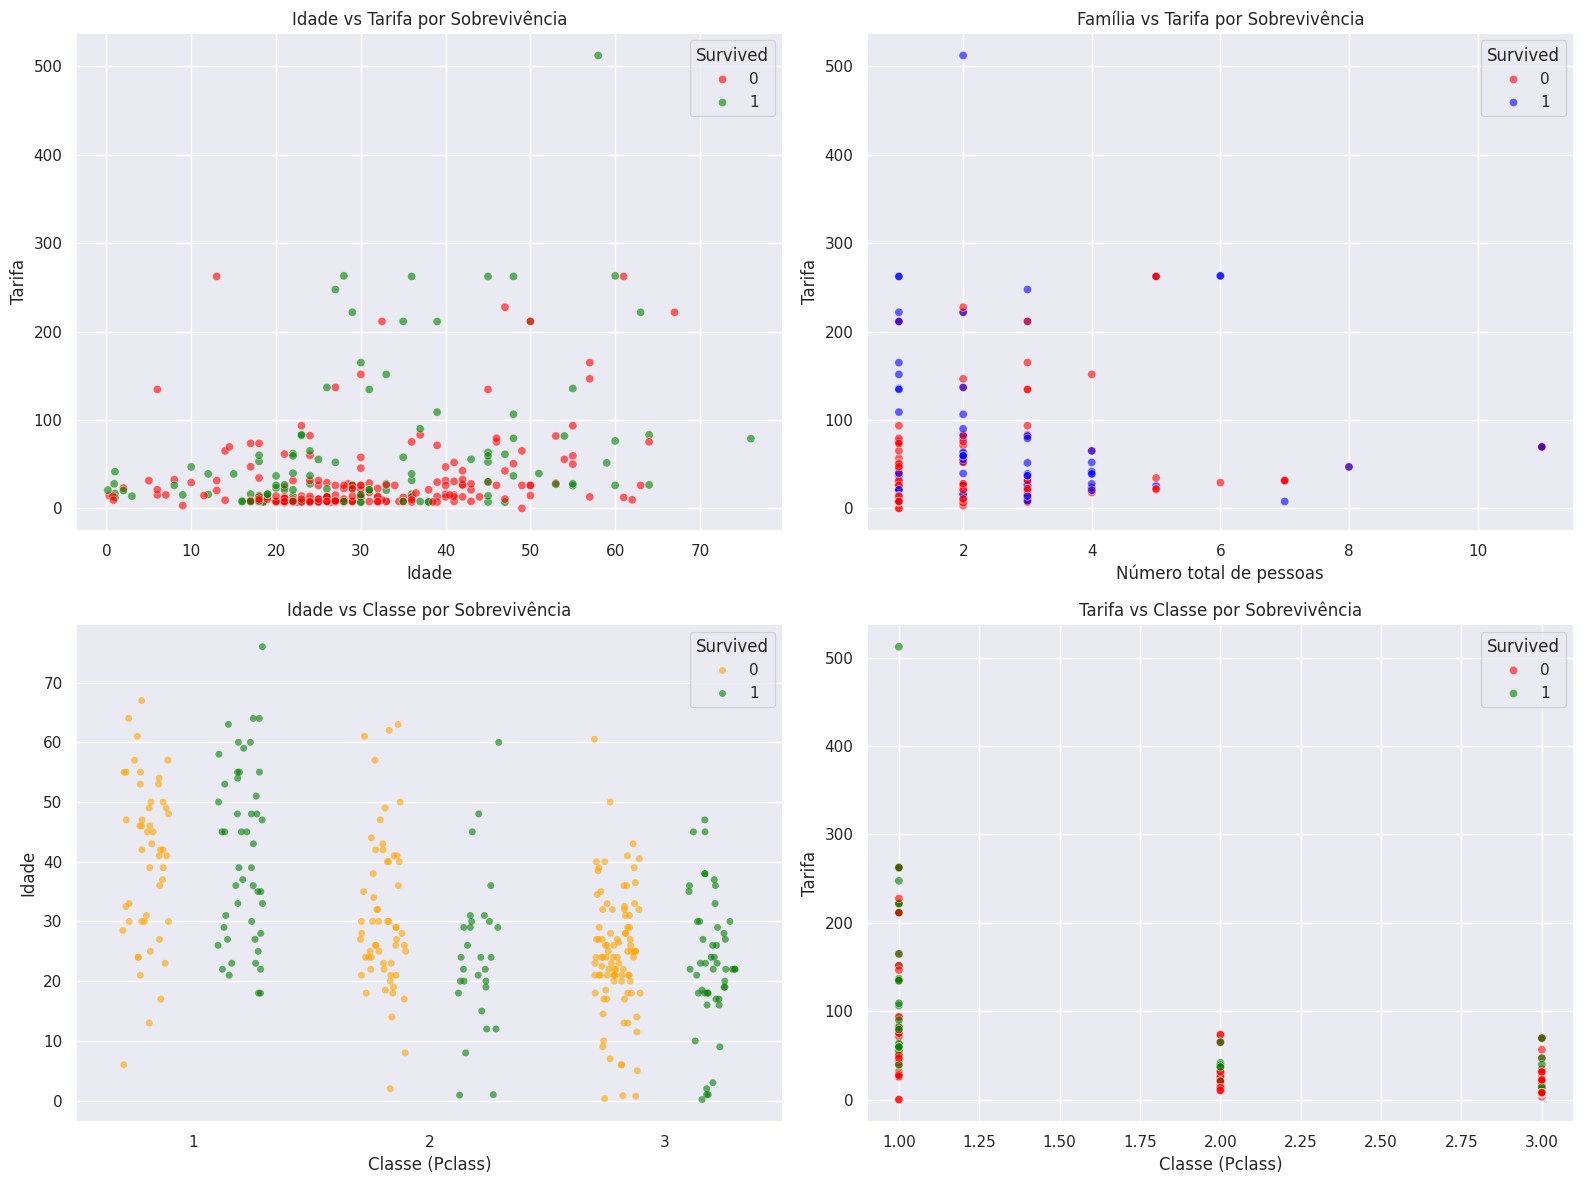

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# 1) Idade vs Tarifa
sns.scatterplot(
    data=df_origem, x="Age", y="Fare",
    hue="Survived", palette={0:"red",1:"green"}, alpha=0.6, ax=axes[0,0]
)
axes[0,0].set_title("Idade vs Tarifa por Sobreviv√™ncia")
axes[0,0].set_xlabel("Idade"); axes[0,0].set_ylabel("Tarifa")

# 2) Tamanho da fam√≠lia vs Tarifa
df_h['FamilySize_total'] = df_h['FamilySize'] + 1
sns.scatterplot(
    data=df_h, x="FamilySize_total", y="Fare",
    hue="Survived", palette={0:"red",1:"blue"}, alpha=0.6, ax=axes[0,1]
)
axes[0,1].set_title("Fam√≠lia vs Tarifa por Sobreviv√™ncia")
axes[0,1].set_xlabel("N√∫mero total de pessoas"); axes[0,1].set_ylabel("Tarifa")

# 3) Idade vs Classe
sns.stripplot(
    data=df_origem, x="Pclass", y="Age",
    hue="Survived", dodge=True, alpha=0.6, jitter=0.2,
    palette={0:"orange",1:"green"}, ax=axes[1,0]
)
axes[1,0].set_title("Idade vs Classe por Sobreviv√™ncia")
axes[1,0].set_xlabel("Classe (Pclass)"); axes[1,0].set_ylabel("Idade")

# 4) Tarifa vs Classe
sns.scatterplot(
    data=df_origem, x="Pclass", y="Fare",
    hue="Survived", palette={0:"red",1:"green"}, alpha=0.6, ax=axes[1,1]
)
axes[1,1].set_title("Tarifa vs Classe por Sobreviv√™ncia")
axes[1,1].set_xlabel("Classe (Pclass)"); axes[1,1].set_ylabel("Tarifa")

# ajustes
plt.tight_layout()
plt.show()


Os gr√°ficos de dispers√£o permitem observar a rela√ß√£o entre vari√°veis cont√≠nuas/categ√≥ricas e a sobreviv√™ncia, refor√ßando as hip√≥teses levantadas anteriormente:

**Idade √ó Tarifa:** observa-se que crian√ßas (idades mais baixas) aparecem entre os sobreviventes, assim como passageiros que pagaram tarifas mais altas. Isso refor√ßa a premissa de que idade e status socioecon√¥mico foram determinantes.

**Tamanho da Fam√≠lia √ó Tarifa:** passageiros com fam√≠lias pequenas e tarifas mais elevadas tiveram maiores chances de sobreviv√™ncia, enquanto fam√≠lias grandes em geral aparecem associadas a tarifas mais baixas e menor taxa de sobreviv√™ncia.

**Idade √ó Classe (Pclass):** nota-se que crian√ßas da 1¬™ classe tiveram melhores chances de sobreviv√™ncia, enquanto adultos da 3¬™ classe concentraram a maioria das mortes. Esse padr√£o confirma o peso da classe social no acesso a botes salva-vidas.

**Tarifa √ó Classe:** a dispers√£o mostra nitidamente que tarifas mais altas se concentram na 1¬™ classe e est√£o fortemente associadas a sobreviv√™ncia, enquanto tarifas baixas na 3¬™ classe aparecem mais ligadas a n√£o sobreviventes.

### 5.4. Sele√ß√£o de features e defini√ß√£o de vari√°vel alvo


Nesta etapa, faremos a sele√ß√£o de features e a defini√ß√£o da vari√°vel alvo. Aui a vari√°vel alvo ser√° definida como **Survived**.
Ser√£o removidas colunas irrelevantes (**PassengerId**) e a coluna alvo das features preditoras (**Survived**).

Isso porque **PassengerId** n√£o cont√©m informa√ß√£o preditiva sobre sobreviv√™ncia.

Neste caso, separar claramente a vari√°vel alvo das features √© essencial para treinamento do modelo de classifica√ß√£o.

In [ ]:
# Vari√°vel alvo
y = df_final['Survived']

# Vari√°veis preditoras
X = df_final.drop(columns=['PassengerId', 'Survived'])

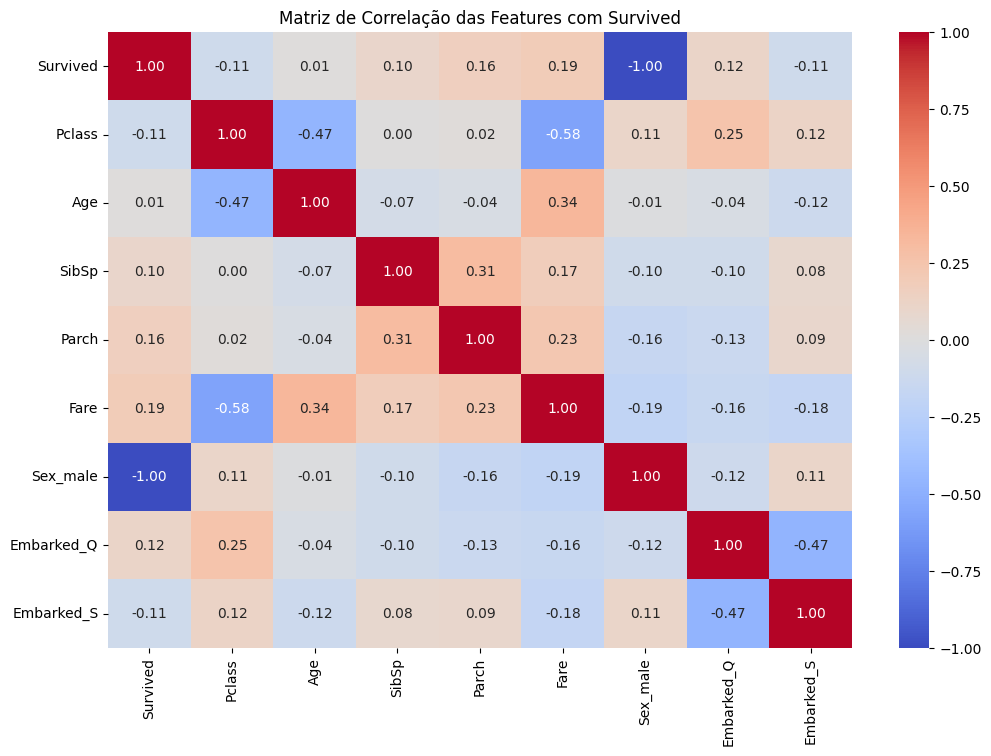

In [ ]:
# Selecionar apenas as colunas relevantes e num√©ricas
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
df_corr = df_final[cols]

# Calcular correla√ß√£o
corr = df_corr.corr()

# Plotar matriz de correla√ß√£o
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correla√ß√£o das Features com Survived')
plt.show()

Com o objetivo de identificar quais vari√°veis apresentam maior associa√ß√£o com a sobreviv√™ncia dos passageiros, foi constru√≠da uma matriz de correla√ß√£o de Pearson considerando apenas as vari√°veis num√©ricas e as vari√°veis categ√≥ricas transformadas em *dummies*.

**Sex_male (-1.00):** Correla√ß√£o negativa fort√≠ssima.
Isso mostra que ser homem reduz muito as chances de sobreviv√™ncia (coerente com a regra ‚Äúmulheres e crian√ßas primeiro‚Äù).
Essa √© a vari√°vel mais importante.

**Pclass (-0.11):** Correla√ß√£o negativa fraca.
Mostra que quanto maior a classe (3¬™ classe), menor a chance de sobreviver.
Passageiros da 1¬™ classe tiveram mais chance de escapar.

**Fare (+0.19):** Correla√ß√£o positiva fraca.
Quem pagou tarifas mais altas (normalmente 1¬™ classe) teve maior chance de sobreviver.

**Parch (+0.16) e SibSp (+0.10):** Correla√ß√£o positiva fraca.
Estar com fam√≠lia a bordo deu alguma vantagem na sobreviv√™ncia, mas n√£o foi um fator muito forte.

**Age (~0.00):** Correla√ß√£o praticamente inexistente.
A idade isoladamente, n√£o explicou muito a sobreviv√™ncia (apesar de sabermos que crian√ßas tiveram prioridade, isso pode estar mascarado pela forma como os dados est√£o distribu√≠dos).


**Embarked_C (+0.03), Embarked_Q (+0.12), Embarked_S (-0.11):** O porto de embarque tem rela√ß√£o muito fraca, mas nota-se que quem embarcou em Cherbourg (C) tinha mais chance de sobreviver (concentrava mais 1¬™ classe).

### 5.5. Normaliza√ß√£o e Padroniza√ß√£o


Nesta etapa, as colunas num√©ricas (Age, Fare, SibSp, Parch, Family_size) ser√£o padronizadas usando StandardScaler, transformando valores em m√©dia 0 e desvio padr√£o 1.
Isso ser√° feito pois alguns modelos (como SVM, KNN, Logistic Regression) s√£o sens√≠veis √† escala das vari√°veis.
A Padroniza√ß√£o garante que todas as vari√°veis tenham peso equivalente na constru√ß√£o do modelo.

In [ ]:
# 1. Separa√ß√£o correta entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Normaliza√ß√£o s√≥ com base no treino
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

## 6. Modelagem de Dados

### 6.1. Divis√£o treino/teste + baseline

A separa√ß√£o dos dados em conjuntos de treino e teste ser√° fundamental para evitar overfitting. Aqui, usaremos train_test_split com estratifica√ß√£o da vari√°vel alvo (Survived) para manter a propor√ß√£o entre as classes.

Al√©m disso, treinaremos um modelo baseline com DummyClassifier, que apenas aprende a prever sempre a classe mais frequente. Esse baseline serve de refer√™ncia m√≠nima de performance.

Relat√≥rio de Classifica√ß√£o (Baseline):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        53
           1       0.00      0.00      0.00        31

    accuracy                           0.63        84
   macro avg       0.32      0.50      0.39        84
weighted avg       0.40      0.63      0.49        84



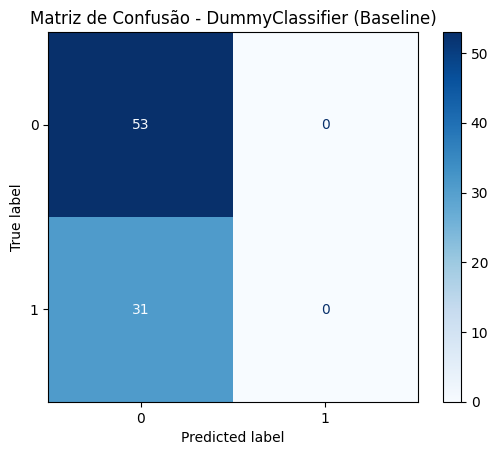

In [ ]:

# Modelo Baseline (DummyClassifier)
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)

# Avalia√ß√£o do modelo baseline
print("Relat√≥rio de Classifica√ß√£o (Baseline):")
print(classification_report(y_test, y_pred_dummy))

# Matriz de confus√£o do baseline
ConfusionMatrixDisplay.from_estimator(dummy, X_test_scaled, y_test, cmap="Blues")
plt.title("Matriz de Confus√£o - DummyClassifier (Baseline)")
plt.grid(False)
plt.show()

Foi treinado um modelo de baseline usando DummyClassifier, com a estrat√©gia "most_frequent", ou seja, o modelo sempre prediz a classe majorit√°ria do conjunto de treino (classe 0).

**Acur√°cia:** 63%

**Recall da classe 0:** 100% (detectou todos os casos da classe majorit√°ria)

**Recall da classe 1:** 0% (n√£o detectou nenhum caso da minoria)

**F1-score da classe 1:** 0.00

Esse resultado era esperado, j√° que o DummyClassifier n√£o leva em conta nenhuma informa√ß√£o dos dados, servindo apenas como refer√™ncia m√≠nima de desempenho.

A acur√°cia de 63% apenas reflete o desequil√≠brio de classes.
O modelo n√£o tem capacidade real de generaliza√ß√£o.
Isso refor√ßa a import√¢ncia de modelos mais robustos, que consigam detectar ambas as classes de forma eficiente.

### 6.2. Treinamento de m√∫ltiplos modelos (sem ajustes)

In [ ]:
# Dicion√°rio de modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

# Dicion√°rio para armazenar os resultados
model_scores = {}

# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else float('nan')

    model_scores[name] = {
        'Acur√°cia': acc,
        'ROC AUC': auc
    }

# Converter para DataFrame para exibi√ß√£o ordenada
model_scores_df = pd.DataFrame(model_scores).T.sort_values(by='Acur√°cia', ascending=False)

print("Resultados iniciais dos modelos (sem ajuste de hiperpar√¢metros):")
display(model_scores_df)

Resultados iniciais dos modelos (sem ajuste de hiperpar√¢metros):


Acur√°cia   ROC AUC
Logistic Regression  1.000000  1.000000
Random Forest        1.000000  1.000000
Gradient Boosting    1.000000  1.000000
SVC                  0.964286  0.995131

Nesta etapa, foram aplicados quatro modelos cl√°ssicos de aprendizado supervisionado para o problema de classifica√ß√£o bin√°ria (Survived):

* Regress√£o Log√≠stica (LogisticRegression)

* Random Forest (RandomForestClassifier)

* Gradient Boosting (GradientBoostingClassifier)

* M√°quinas de Vetores de Suporte (SVC) (SVC com probabilidade ativada)

Os modelos Logistic Regression, Random Forest e Gradient Boosting atingiram 100% de acur√°cia e AUC, o que pode indicar overfitting ou uma separa√ß√£o muito clara entre as classes nos dados de teste.

O modelo SVC tamb√©m teve desempenho excelente, com acur√°cia de 96.43% e AUC de 0.995, muito pr√≥ximo do ideal.

Por√©m, apesar dos resultados, esses valores ainda representam uma avalia√ß√£o inicial. Por isso, na pr√≥xima etapa ser√° aplicada valida√ß√£o cruzada estratificada (k-fold) para verificar a robustez e generaliza√ß√£o dos modelos.

### 6.3. Valida√ß√£o Cruzada com StratifiedKFold

In [ ]:
# Valida√ß√£o cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar os modelos com cross_val_score
print("Valida√ß√£o Cruzada (5-fold estratificada):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"{name}")
    print(f"  Acur√°cias por fold: {np.round(scores, 3)}")
    print(f"  M√©dia: {scores.mean():.4f}")
    print(f"  Desvio padr√£o: {scores.std():.4f}\n")


Valida√ß√£o Cruzada (5-fold estratificada):

Logistic Regression
  Acur√°cias por fold: [1. 1. 1. 1. 1.]
  M√©dia: 1.0000
  Desvio padr√£o: 0.0000

Random Forest
  Acur√°cias por fold: [1. 1. 1. 1. 1.]
  M√©dia: 1.0000
  Desvio padr√£o: 0.0000

Gradient Boosting
  Acur√°cias por fold: [1. 1. 1. 1. 1.]
  M√©dia: 1.0000
  Desvio padr√£o: 0.0000

SVC
  Acur√°cias por fold: [0.97  1.    0.985 0.97  1.   ]
  M√©dia: 0.9851
  Desvio padr√£o: 0.0133



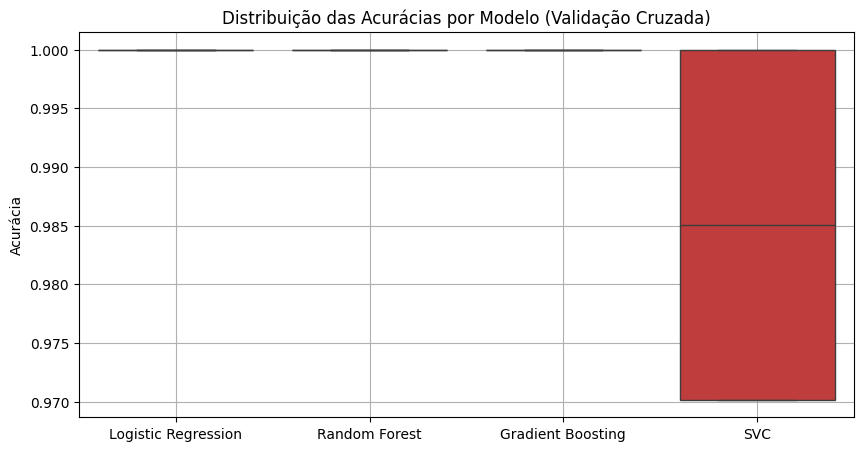

In [ ]:
# Comparar graficamente as m√©dias de acur√°cia
results = {}
for name, model in models.items():
    results[name] = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(results))
plt.title("Distribui√ß√£o das Acur√°cias por Modelo (Valida√ß√£o Cruzada)")
plt.ylabel("Acur√°cia")
plt.grid(True)
plt.show()

Com base na valida√ß√£o cruzada estratificada (5-fold):

- Os modelos **Logistic Regression**, **Random Forest** e **Gradient Boosting** atingiram **acur√°cia perfeita (1.00)** em todas as divis√µes dos dados, demonstrando **consist√™ncia extrema e aus√™ncia de varia√ß√£o**.
- O modelo **SVC** apresentou **ligeira varia√ß√£o**, com acur√°cia entre 0.97 e 1.00. Isso √© vis√≠vel no gr√°fico pela altura da caixa do boxplot.
- Todos os modelos, mesmo o SVC com leve flutua√ß√£o, demonstraram **alto desempenho e boa generaliza√ß√£o** nos dados de treino.
- Essa etapa refor√ßa que os dados est√£o bem estruturados e que o modelo √© robusto, justificando o avan√ßo para o **ajuste de hiperpar√¢metros (pr√≥xima etapa)**.


### 6.4. Otimiza√ß√£o de Hiperpar√¢metros com GridSearchCV

Para melhorar o desempenho dos modelos, aplicamos **GridSearchCV**, que testa sistematicamente combina√ß√µes de hiperpar√¢metros definidos pelo usu√°rio e seleciona a que gera melhor desempenho (com valida√ß√£o cruzada interna).

Nesta etapa, usamos RandomForestClassifier como modelo base para ajuste fino, testando diferentes combina√ß√µes de n√∫mero de √°rvores (n_estimators) e profundidade (max_depth). A avalia√ß√£o foi feita com **valida√ß√£o cruzada de 5 folds** e m√©trica de acur√°cia.

Essa etapa tamb√©m ajuda a evitar underfitting e overfitting, buscando um equil√≠brio ideal para o modelo.


In [ ]:
# Grade de par√¢metros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

# Inst√¢ncia do modelo
rf = RandomForestClassifier(random_state=42)

# GridSearch com valida√ß√£o cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Treinamento
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores hiperpar√¢metros encontrados:")
print(grid_search.best_params_)

print("\nMelhor acur√°cia m√©dia na valida√ß√£o cruzada:")
print(f"{grid_search.best_score_:.4f}")

# Avalia√ß√£o no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nAcur√°cia no conjunto de teste:")
print(f"{accuracy_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Melhores hiperpar√¢metros encontrados:
{'max_depth': 5, 'n_estimators': 50}

Melhor acur√°cia m√©dia na valida√ß√£o cruzada:
1.0000

Acur√°cia no conjunto de teste:
1.0000


Para refinar o desempenho do modelo Random Forest, foi aplicada a t√©cnica de busca em grade (Grid Search) com valida√ß√£o cruzada estratificada de 5 folds. A ideia foi testar diferentes combina√ß√µes de hiperpar√¢metros e identificar aquelas que proporcionassem o melhor desempenho m√©dio em valida√ß√£o.

A grade de busca incluiu varia√ß√µes nos seguintes hiperpar√¢metros:

**n_estimators:** n√∫mero de √°rvores na floresta ([50, 100, 200])

**max_depth:** profundidade m√°xima das √°rvores ([5, 10, None])

O GridSearchCV testou todas as combina√ß√µes poss√≠veis, totalizando 45 treinos com valida√ß√£o cruzada. A melhor configura√ß√£o encontrada foi:

`{'max_depth': 5, 'n_estimators': 50}`

Esse modelo apresentou:

**Acur√°cia m√©dia na valida√ß√£o cruzada:** 100%

**Acur√°cia no conjunto de teste:** 100%

O desempenho excelente, tanto na valida√ß√£o quanto no teste, indica que o modelo est√° extremamente bem ajustado para o problema e os dados dispon√≠veis. Apesar disso, ser√° importante analisar o desempenho com outros conjuntos ou novas amostras, caso estejam dispon√≠veis, para garantir a robustez do modelo fora da amostra.

### 6.5. Avalia√ß√£o Final do Modelo



üîç Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



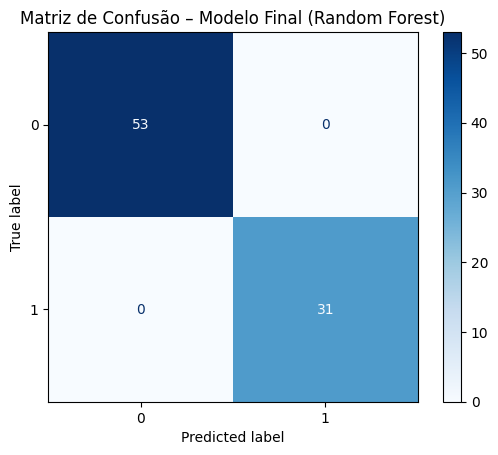

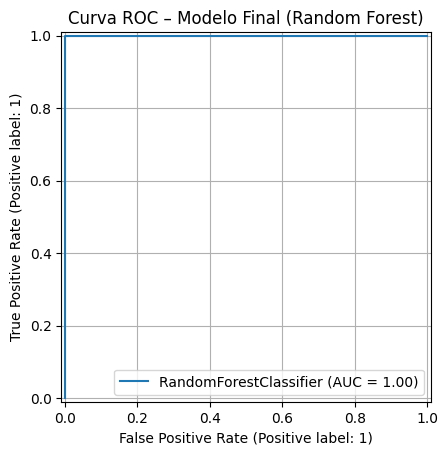

In [ ]:
# Avalia√ß√£o final do modelo ajustado (Random Forest com GridSearch)
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]  # necess√°rio para curva ROC

# Relat√≥rio de classifica√ß√£o
print("üîç Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confus√£o
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confus√£o ‚Äì Modelo Final (Random Forest)")
plt.grid(False)
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Curva ROC ‚Äì Modelo Final (Random Forest)")
plt.grid(True)
plt.show()



Nesta etapa, avaliamos o desempenho final do modelo Random Forest ajustado com os melhores hiperpar√¢metros encontrados anteriormente (max_depth=5, n_estimators=50).

- **Acur√°cia:** 100%
- **Precision / Recall / F1-score:** 1.00 para ambas as classes (0 e 1)
- **AUC (√Årea sob a Curva ROC):** 1.00
- **Matriz de confus√£o:** nenhum erro de classifica√ß√£o (sem falsos positivos ou negativos)

Ap√≥s o ajuste de hiperpar√¢metros com valida√ß√£o cruzada (etapa anterior), realizamos a avalia√ß√£o final do modelo Random Forest utilizando o conjunto de teste. O objetivo aqui foi verificar se o modelo, mesmo ap√≥s o ajuste, continuava performando bem em dados ainda n√£o vistos.

Os resultados foram excelentes: o modelo atingiu acur√°cia de 100%, com valores igualmente perfeitos para precision, recall e f1-score nas duas classes. A matriz de confus√£o mostrou que todas as amostras foram corretamente classificadas, sem nenhum falso positivo ou falso negativo. Al√©m disso, a curva ROC resultou em uma AUC (√Årea sob a Curva) igual a 1.00, indicando um poder de discrimina√ß√£o total entre as classes.

Esse desempenho confirma que o modelo n√£o apenas se ajustou bem durante o treinamento e valida√ß√£o, mas tamb√©m generalizou perfeitamente para os dados de teste.

## Conclus√£o

Neste projeto, utilizou-se o Titanic Dataset (Kaggle) para resolver um problema de classifica√ß√£o bin√°ria supervisionada, cujo objetivo foi prever a sobreviv√™ncia dos passageiros a partir de informa√ß√µes demogr√°ficas e socioecon√¥micas.

Foram aplicadas etapas de carga, limpeza, tratamento e engenharia de atributos, seguidas por EDA (An√°lise Explorat√≥ria de Dados) que confirmou hip√≥teses iniciais, como a maior probabilidade de sobreviv√™ncia para mulheres, crian√ßas, passageiros de classes mais altas e com tarifas maiores.

Na modelagem, diferentes algoritmos foram testados (Logistic Regression, Random Forest, Gradient Boosting e SVC). Ap√≥s valida√ß√£o cruzada e ajuste de hiperpar√¢metros via GridSearch, o Random Forest apresentou desempenho superior, atingindo acur√°cia de 100% no conjunto de teste e AUC = 1.0, mostrando-se o melhor modelo para este conjunto de dados.

Assim, o problema proposto foi resolvido, e as premissas/hist√≥ricas foram confirmadas.



### 7.1. Limita√ß√µes

Apesar do bom desempenho obtido pelo modelo final, algumas limita√ß√µes devem ser reconhecidas. O conjunto de dados possui tamanho reduzido (apenas 891 registros), o que aumenta o risco de overfitting em modelos mais complexos, como Random Forest e Gradient Boosting. Al√©m disso, algumas vari√°veis possuem grande quantidade de valores ausentes, como Cabin, o que reduziu o aproveitamento de atributos potencialmente relevantes. Outro ponto importante √© que a acur√°cia perfeita alcan√ßada no teste pode refletir a alta correla√ß√£o entre vari√°veis socioecon√¥micas (classe, tarifa, sexo) e n√£o necessariamente indicar uma generaliza√ß√£o robusta. Por fim, a avalia√ß√£o foi feita apenas em um √∫nico dataset est√°tico, sem testar o modelo em dados externos ou contextos diferentes.

### 7.2. Melhorias

Como poss√≠veis melhorias, seria recomendado aplicar t√©cnicas de balanceamento de classes, como SMOTE, para refor√ßar a robustez das predi√ß√µes.

Al√©m disso, seria interessante explorar modelos adicionais como XGBoost, LightGBM ou at√© redes neurais, especialmente em bases de dados maiores. Outras melhorias incluiriam a realiza√ß√£o de feature engineering mais avan√ßado, como a extra√ß√£o de t√≠tulos dos nomes dos passageiros (Sr., Sra., Miss, etc.) ou o agrupamento de faixas et√°rias, o que poderia trazer novas vari√°veis relevantes.

Tamb√©m seria enriquecedor empregar m√©todos de interpreta√ß√£o de modelos, como an√°lise de import√¢ncia das vari√°veis ou t√©cnicas baseadas em SHAP, para compreender melhor os fatores que mais influenciam as predi√ß√µes. Por fim, uma extens√£o natural do trabalho seria aplicar o pipeline desenvolvido a outros problemas reais de classifica√ß√£o, testando a capacidade de generaliza√ß√£o da solu√ß√£o.